In [1]:
#Import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [2]:
#Load data 
data_df = pd.read_csv('/Users/hannahkollmann/Desktop/customer_data.csv')

#Checking data file by printing first rows
data_df.head(5)

,id,age,gender,income,education,region,loyalty_status,purchase_frequency,purchase_amount,product_category,promotion_usage,satisfaction_score
0,1,27,Male,40682,Bachelor,East,Gold,frequent,18249,Books,0,6
1,2,29,Male,15317,Masters,West,Regular,rare,4557,Clothing,1,6
2,3,37,Male,38849,Bachelor,West,Silver,rare,11822,Clothing,0,6
3,4,30,Male,11568,HighSchool,South,Regular,frequent,4098,Food,0,7
4,5,31,Female,46952,College,North,Regular,occasional,19685,Clothing,1,5


In [3]:
#Data cleaning
#Check for missing values
print(data_df.isnull().sum())

id                    0
age                   0
gender                0
income                0
education             0
region                0
loyalty_status        0
purchase_frequency    0
purchase_amount       0
product_category      0
promotion_usage       0
satisfaction_score    0
dtype: int64


In [4]:
#List data types 
data_df.dtypes

id                     int64
age                    int64
gender                object
income                 int64
education             object
region                object
loyalty_status        object
purchase_frequency    object
purchase_amount        int64
product_category      object
promotion_usage        int64
satisfaction_score     int64
dtype: object

In [5]:
#Frequency table 
print(data_df['loyalty_status'].value_counts(), end = "\n\n")
print(data_df['purchase_frequency'].value_counts(), end = "\n\n")


Regular    60138
Silver     29964
Gold        9898
Name: loyalty_status, dtype: int64

rare          50019
occasional    29886
frequent      20095
Name: purchase_frequency, dtype: int64



In [6]:
# Do loyalty programs affect how frequntly the customers shop? 
purchase_by_loyalty = data_df.groupby("loyalty_status")["purchase_frequency"].value_counts()
purchase_by_loyalty

loyalty_status  purchase_frequency
Gold            rare                   4974
                occasional             2932
                frequent               1992
Regular         rare                  30112
                occasional            18037
                frequent              11989
Silver          rare                  14933
                occasional             8917
                frequent               6114
Name: purchase_frequency, dtype: int64

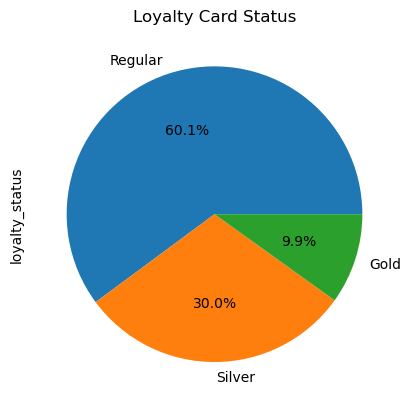

In [7]:
# Generate a pie plot showing the distribution loyalty status using Pandas
loyalty_plot = data_df["loyalty_status"].value_counts()
loyalty_plot.plot(kind='pie', autopct='%1.1f%%')

#Plot title
plt.title("Loyalty Card Status")

#Display plot 
plt.show()

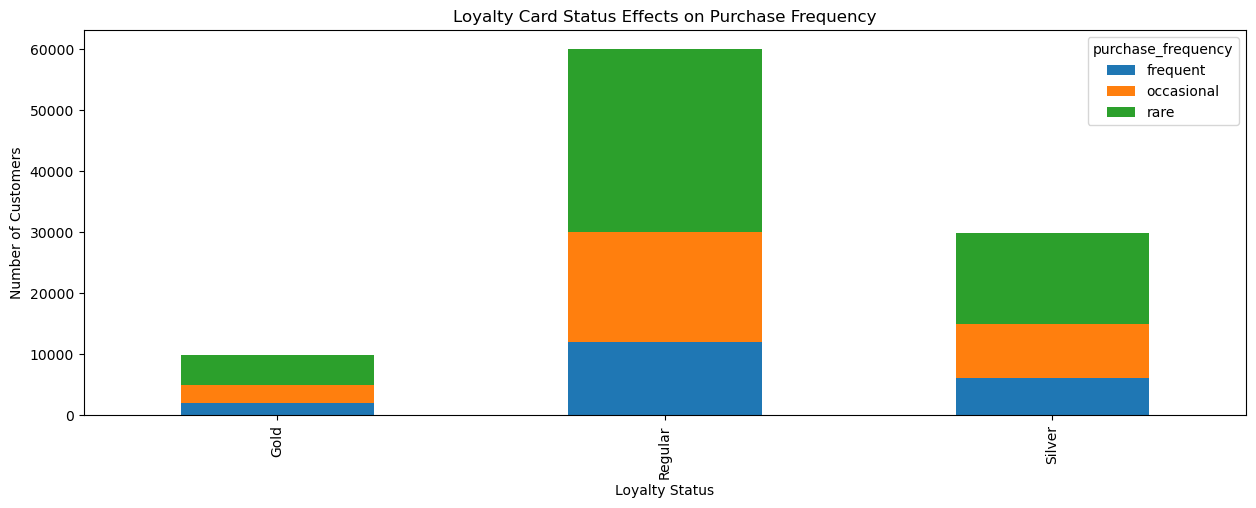

In [10]:
# Create stacked column chart 
stacked_chart = data_df.groupby(['loyalty_status', 'purchase_frequency']).size().unstack().plot(kind='bar', stacked=True, figsize=(15, 5))

# Label x and y axis and add title 
stacked_chart.set_xlabel("Loyalty Status")
stacked_chart.set_ylabel("Number of Customers")
plt.title("Loyalty Card Status Effects on Purchase Frequency")

# Display plot
plt.show()


In [14]:
# Research Question: Do loyalty programs affect how frequently the customers shop? 
# Hypothesis = If loyalty programs are related to the frequency of customer purchases , there will be a strong correlation. 
# Null Hypothesis = There is no association between loyalty status and purchase frequency.
# Alternative Hypothesis = There is an assocaition between loyalty status and purchase frequency.



In [15]:
# The statistical module used to determine significance will be the Chi-Square Test
# Determine the critical value 
